# Logistic Regression on Credit card Default probability

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model

%matplotlib inline
plt.style.use('seaborn-white')


C:\conda_tmp\ipykernel_2304\380965037.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
credit = pd.read_csv("Credit.csv", usecols= list(range(1,12)))
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


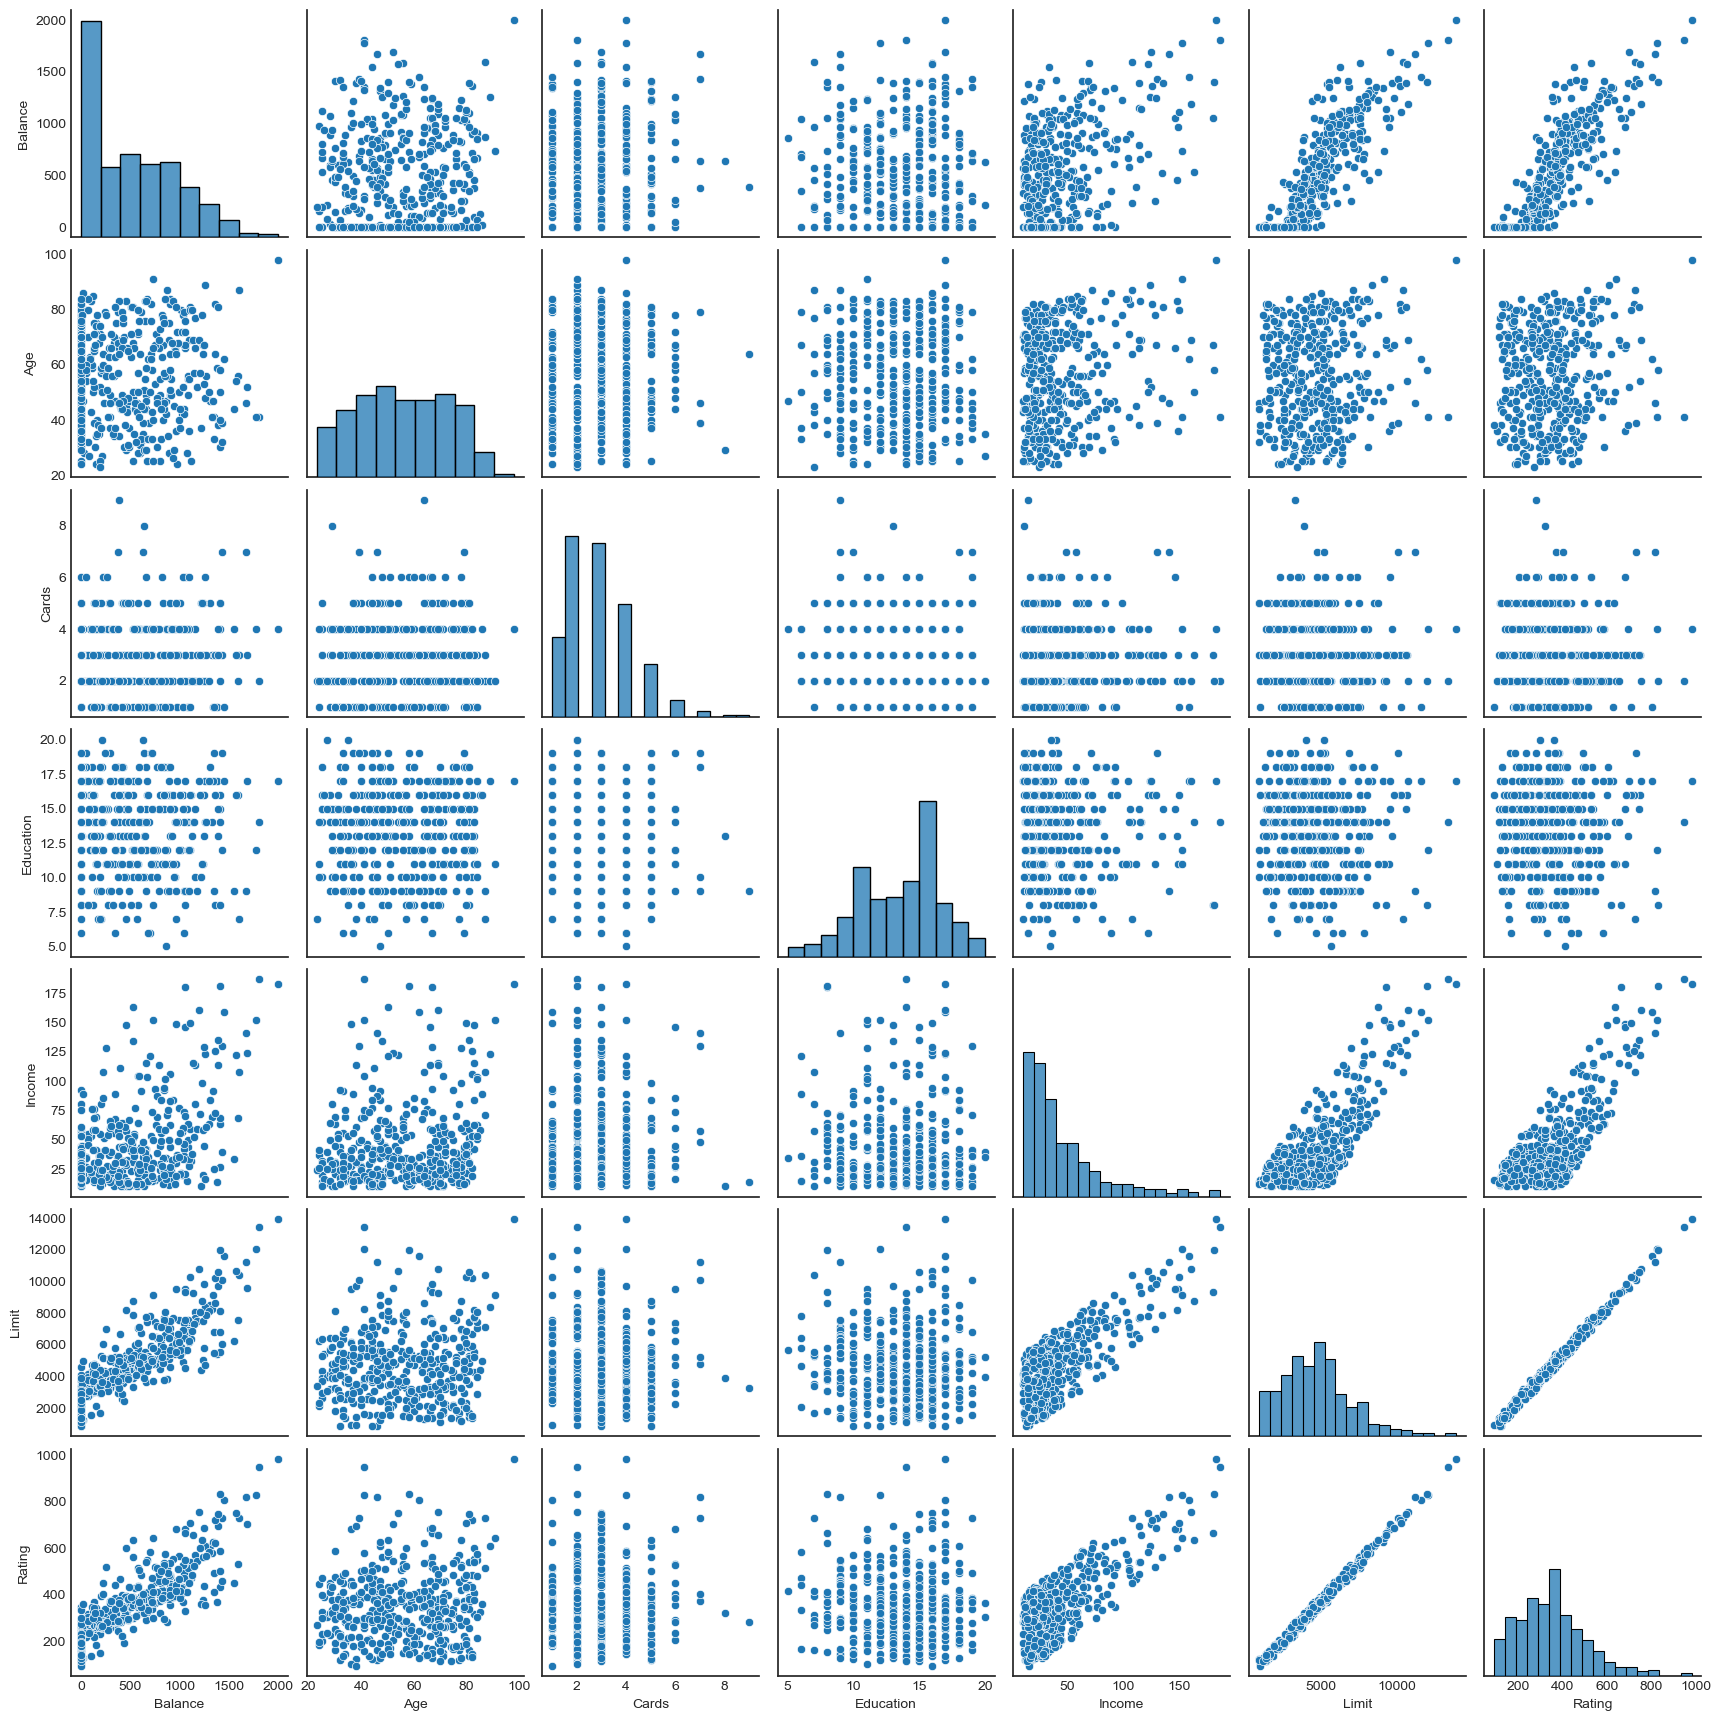

In [3]:
# Plotting all the quantitative variables 
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

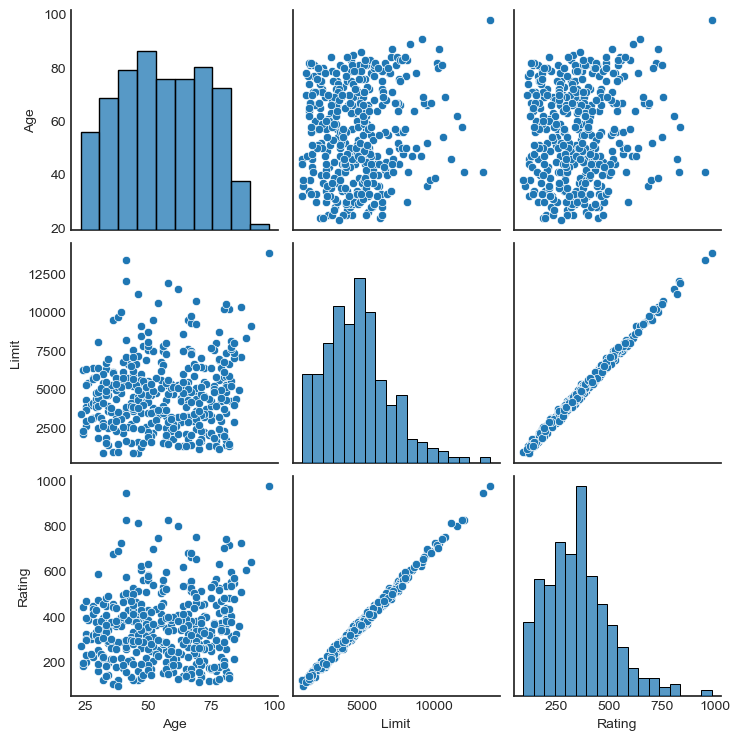

In [4]:
sns.pairplot(credit[['Age','Limit','Rating']])

In [5]:
df = pd.read_excel('Default.xlsx')
df.head()

c:\anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [6]:
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head()

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0


In [7]:
X_train = df.balance.values.reshape(-1, 1)
Y_train = df.default2

X_test = np.arange(df.balance.min(),df.balance.max()).reshape(-1, 1)
X_test

array([[0.000e+00],
       [1.000e+00],
       [2.000e+00],
       ...,
       [2.652e+03],
       [2.653e+03],
       [2.654e+03]])

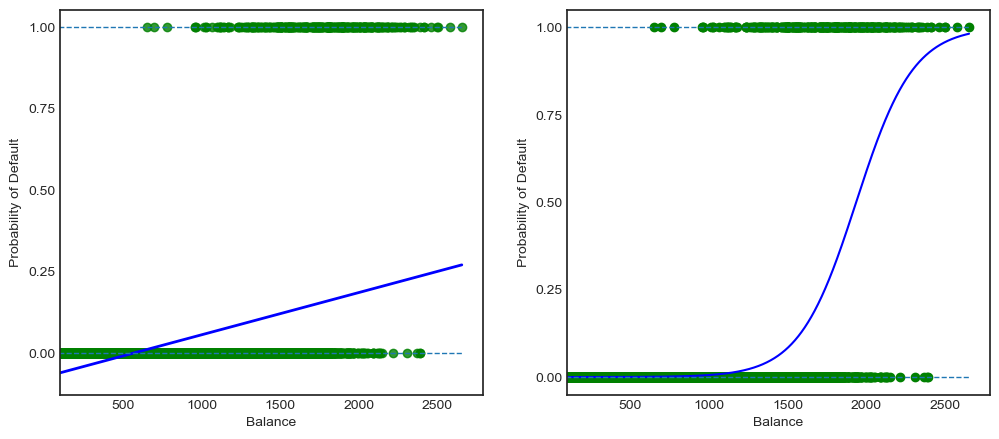

In [8]:
classifier = linear_model.LogisticRegression(solver='newton-cg')
classifier.fit(X_train,Y_train)
probability = classifier.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left Plot
sns.regplot(x=df.balance, y=df.default2, order=1, ci=None, scatter_kws={'color':'green'}, line_kws={'color':'blue', 'lw':2}, ax= ax1)

# sns.regplot(df.balance,df.default2,order=1,ci=None,scatter_kws={'color':'green'},line_kws={'color':'blue','lw':2},ax=ax1)
# Right Plot
ax2.scatter(X_train, Y_train, color='green')
ax2.plot(X_test, probability[: ,1], color='blue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)

    ax.set_ylabel("Probability of Default")
    ax.set_xlabel("Balance")
    ax.set_yticks([0, 0.25, 0.50, 0.75, 1.])
    ax.set_xlim(xmin=100)

In [9]:
print(classifier)
print('coefficient: ', classifier.coef_)
print('intercept: ', classifier.intercept_)

LogisticRegression(solver='newton-cg')
coefficient:  [[0.00549892]]
intercept:  [-10.65132884]


- ### Q. What is the probability of default if balance is $1000?
- ### Q. Predict probability of default if balance is $1000, $2000, $3000, $4000.

In [10]:
# Try to predict probability of default if balance is $1000
X_test = np.array(1000).reshape(-1,1)
print(" Probability of default for $1000: \n", classifier.predict_proba(X_test))

# Try to predict probability of default if balance is $1000, $2000, $3000, $4000
X_test = np.arange(1000, 5000, 1000).reshape(-1, 1)
print("\n \n Probability of default if balance is $1000, $2000, $3000, $4000: \n", classifier.predict_proba(X_test))

 Probability of default for $1000: 
 [[0.99424785 0.00575215]]

 
 probability of default if balance is $1000, $2000, $3000, $4000: 
 [[9.94247851e-01 5.75214908e-03]
 [4.14230720e-01 5.85769280e-01]
 [2.88477698e-03 9.97115223e-01]
 [1.18362176e-05 9.99988164e-01]]


In [11]:
import math

y = math.exp(classifier.intercept_+classifier.coef_*1000)
p_1000 = y/(1+y)
print(round(p_1000*100, 2))

0.58


In [12]:
z = math.exp(classifier.intercept_+classifier.coef_*2000)
p_2000 = z/(1+z)
print(round(p_2000*100, 2))

58.58


## What probability if it is a non-student and defaults?

In [13]:
import statsmodels.api as sm

In [14]:
X_train = sm.add_constant(df.balance)
Y_train = df.default2

est = sm.Logit(Y_train, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [16]:
X_train = sm.add_constant(df.student2)
Y_train = df.default2

est = sm.Logit(Y_train, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


In [32]:
y = math.exp(-3.504128 + 0.404887*0)
prob_notStudent = y/(1 + y)
print(round(prob_notStudent, 4))

0.0292


In [33]:
y_1 = math.exp(-3.504128 + 0.404887*1)
prob_Student = y_1/(1 + y_1)
print(round(prob_Student, 4))

0.0431


# Multiple Logistic Regression

In [34]:
# Multiple Logistic Regression

X_train = sm.add_constant(df[["balance","income","student2"]])
Y_train = df.default2

est = sm.Logit(Y_train, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


### Q. A student has an income of $40k and card balance of 1500. What is the probability of student default?

In [39]:
# A student has an income of $40k and card balance of 1500. What is the probability of student default

eq = math.exp(-10.869045 + 0.005737*1500 + 0.000003* 40000 + -0.646776*1)
default_prob = eq/(1+eq)
print(round(default_prob*100, 4))

5.7849
